In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('Dublin_2012_Step2.csv')

/Users/April/anaconda/envs/comp47350/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Delay,Stop_ID,At_Stop,Distance_Terminal,datetime,day_of_week,Trip_Time
0,0,1352160000,00150001,2012-11-05,5826,-6.258584,53.340099,-361,4870,0,0.0,2012-11-06 00:00:00,Tuesday,0
1,1,1352160000,046A1002,2012-11-05,7267,-6.259093,53.345425,-1101,794,0,0.0,2012-11-06 00:00:00,Tuesday,0
2,2,1352160000,00140001,2012-11-05,6206,-6.257329,53.287521,-126,1047,0,0.0,2012-11-06 00:00:00,Tuesday,0
3,3,1352160002,041B0002,2012-11-05,61,-6.264167,53.453217,-623,3874,1,0.0,2012-11-06 00:00:02,Tuesday,0
4,4,1352160002,039A1002,2012-11-05,3795,-6.262447,53.346767,-532,1479,0,0.0,2012-11-06 00:00:02,Tuesday,0


In [4]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [5]:
# dropping columns that we won't have from the user side as input so therefore we can't train the model based on those features
# such as delay, congestion and date can't be used either (too specific)

In [6]:
df.shape

(3169731, 13)

In [7]:
df.tail(3)

,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Delay,Stop_ID,At_Stop,Distance_Terminal,datetime,day_of_week,Trip_Time
3169728,1352764796,00331005,2012-11-12,269,-6.109184,53.580326,-36,3818,0,7483.98,2012-11-12 23:59:56,Monday,581
3169729,1352764796,00380001,2012-11-12,1269,-6.375340,53.399990,154,1819,0,16435.03,2012-11-12 23:59:56,Monday,2824
3169730,1352764798,015A0001,2012-11-12,3130,-6.299134,53.311970,267,1089,0,8033.41,2012-11-12 23:59:58,Monday,1779


In [8]:
df.dtypes

Timestamp               int64
Journey_Pattern_ID     object
Date                   object
Vehicle_Journey_ID      int64
Lon_WGS84             float64
Lat_WGS84             float64
Delay                   int64
Stop_ID                object
At_Stop                 int64
Distance_Terminal     float64
datetime               object
day_of_week            object
Trip_Time               int64
dtype: object

In [10]:
continuous_features = ['Distance_Terminal', 'Trip_Time', 'Timestamp']
categorical_features = ['Journey_Pattern_ID', 'Date', 'Vehicle_Journey_ID','Stop_ID','At_Stop','day_of_week']



In [11]:
for item in categorical_features:
    df[item] = df[item].astype('category')

In [12]:
df.dtypes

Timestamp                int64
Journey_Pattern_ID    category
Date                  category
Vehicle_Journey_ID    category
Lon_WGS84              float64
Lat_WGS84              float64
Delay                    int64
Stop_ID               category
At_Stop               category
Distance_Terminal      float64
datetime                object
day_of_week           category
Trip_Time                int64
dtype: object

## Prepare a table with descriptive statistics for all continuous features

In [13]:
df[continuous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Distance_Terminal,3169731.0,1.058563e+04,7476.727585,0.000000e+00,4.686710e+03,9.470000e+03,1.544884e+04,1.980576e+05
Trip_Time,3169731.0,2.077141e+03,1400.227907,0.000000e+00,9.580000e+02,1.834000e+03,2.983000e+03,1.079200e+04
Timestamp,3169731.0,1.352454e+09,175998.920968,1.352160e+09,1.352302e+09,1.352449e+09,1.352584e+09,1.352765e+09


In [24]:
df_max_trip=df.loc[df['Distance_Terminal']>50000]
df_max_trip

,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Delay,Stop_ID,At_Stop,Distance_Terminal,datetime,day_of_week,Trip_Time
1029,1352162626,00651001,2012-11-05,4005,-6.375520,53.285774,-598,2360,0,50399.90,2012-11-06 00:43:46,Tuesday,2022
1030,1352162646,00651001,2012-11-05,4005,-6.375206,53.287636,-598,4348,0,50608.18,2012-11-06 00:44:06,Tuesday,2042
1031,1352162686,00651001,2012-11-05,4005,-6.372745,53.289700,-619,4646,0,51001.39,2012-11-06 00:44:46,Tuesday,2082
1032,1352162706,00651001,2012-11-05,4005,-6.369690,53.290421,-619,4647,0,51220.35,2012-11-06 00:45:06,Tuesday,2102
1033,1352162747,00651001,2012-11-05,4005,-6.367764,53.289150,-619,2346,0,51473.79,2012-11-06 00:45:47,Tuesday,2143
1034,1352162787,00651001,2012-11-05,4005,-6.362541,53.287998,-641,4435,0,51881.86,2012-11-06 00:46:27,Tuesday,2183
1035,1352162847,00651001,2012-11-05,4005,-6.355465,53.288197,-641,2594,0,52354.31,2012-11-06 00:47:27,Tuesday,2243
1036,1352162887,00651001,2012-11-05,4005,-6.345677,53.289169,-679,2595,0,53015.97,2012-11-06 00:48:07,Tuesday,2283
1037,1352162930,00651001,2012-11-05,4005,-6.339337,53.289082,-695,2596,0,53454.75,2012-11-06 00:48:50,Tuesday,2326
1038,1352162966,00651001,2012-11-05,4005,-6.332688,53.290417,-695,2597,0,53939.65,2012-11-06 00:49:26,Tuesday,2362


In [26]:
# 30 (31240, 13)  40 (2744, 13) 50 (2744, 13)
df_max_trip.shape

(2744, 13)

In [16]:
df_max_trip=df.loc[(df['Vehicle_Journey_ID']==3804) & (df['day_of_week']=='Friday')]
df_max_trip

,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Delay,Stop_ID,At_Stop,Distance_Terminal,datetime,day_of_week,Trip_Time
1829452,1352476724,039A0001,2012-11-09,3804,-6.216970,53.306770,-103,767,0,0.00,2012-11-09 15:58:44,Friday,0
1830348,1352476822,039A0001,2012-11-09,3804,-6.218855,53.309505,-99,768,1,472.67,2012-11-09 16:00:22,Friday,98
1830891,1352476882,039A0001,2012-11-09,3804,-6.219975,53.310287,-59,768,0,587.33,2012-11-09 16:01:22,Friday,158
1831079,1352476902,039A0001,2012-11-09,3804,-6.221674,53.312637,-88,769,0,872.33,2012-11-09 16:01:42,Friday,178
1831942,1352476999,039A0001,2012-11-09,3804,-6.225667,53.314777,-34,770,1,1235.52,2012-11-09 16:03:19,Friday,275
1831989,1352477003,039A0001,2012-11-09,3804,-6.227878,53.316151,-57,771,0,1447.88,2012-11-09 16:03:23,Friday,279
1832307,1352477041,039A0001,2012-11-09,3804,-6.231356,53.318680,-57,772,0,1812.49,2012-11-09 16:04:01,Friday,317
1832686,1352477084,039A0001,2012-11-09,3804,-6.234359,53.320904,-96,773,0,2130.78,2012-11-09 16:04:44,Friday,360
1832885,1352477103,039A0001,2012-11-09,3804,-6.237105,53.322258,-133,774,0,2367.83,2012-11-09 16:05:03,Friday,379
1833248,1352477144,039A0001,2012-11-09,3804,-6.239009,53.323555,-133,775,1,2560.37,2012-11-09 16:05:44,Friday,420


In [17]:
from geopy.distance import distance

distance((53.353233, -6.274066), (53.391613, -6.436800)).meters

11643.083201605947

In [28]:
df=df.drop(df.index[df['Distance_Terminal']>50000])

## Prepare a table with descriptive statistics for all categorical features

In [29]:
df[categorical_features].describe().T

,count,unique,top,freq
Journey_Pattern_ID,3166987,471,046A1001,63756
Date,3166987,8,2012-11-08,512792
Vehicle_Journey_ID,3166987,17400,4746,733
Stop_ID,3166987,9185,794,9669
At_Stop,3166987,2,0,2286367
day_of_week,3166987,7,Thursday,512717


## Drop duplicate rows and columns, if any

In [30]:
df.drop_duplicates(keep='first')
df.shape

(3166987, 13)

In [31]:
df.head(3)

,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Delay,Stop_ID,At_Stop,Distance_Terminal,datetime,day_of_week,Trip_Time
0,1352160000,00150001,2012-11-05,5826,-6.258584,53.340099,-361,4870,0,0.0,2012-11-06 00:00:00,Tuesday,0
1,1352160000,046A1002,2012-11-05,7267,-6.259093,53.345425,-1101,794,0,0.0,2012-11-06 00:00:00,Tuesday,0
2,1352160000,00140001,2012-11-05,6206,-6.257329,53.287521,-126,1047,0,0.0,2012-11-06 00:00:00,Tuesday,0


## Drop constance columns, if any

In [18]:
# we can see from the above tables that the only constant feature is at_stop
# this is because in this dataset we have filterd by at_stop == 1
df.drop(df[['At_Stop']], axis=1, inplace=True)
        
# result
df.shape

(448901, 14)

In [19]:
# save all results to a csv
df.to_csv('sample_week_analysis.csv')

KeyboardInterrupt: 

## Prepare descriptive stats for new df

## For Continuous Features

In [32]:
df[continuous_features].describe(include="all").T
# how to include cardinality and % of missing values? 

,count,mean,std,min,25%,50%,75%,max
Distance_Terminal,3166987.0,1.053516e+04,7236.351175,0.000000e+00,4.682680e+03,9.460740e+03,1.543240e+04,4.999963e+04
Trip_Time,3166987.0,2.075608e+03,1399.161379,0.000000e+00,9.570000e+02,1.831000e+03,2.981000e+03,1.079200e+04
Timestamp,3166987.0,1.352454e+09,175983.989750,1.352160e+09,1.352302e+09,1.352449e+09,1.352584e+09,1.352765e+09


In [33]:
# check for missing values
df[continuous_features].isnull().sum()

Distance_Terminal    0
Trip_Time            0
Timestamp            0
dtype: int64

In [34]:
# check cardinality
card_list = []
count_list = []
continuous_columns = df[continuous_features].columns
for column in continuous_columns:
    card_list.append(df[column].nunique())
    count_list.append(df[column].count())
    
df_cardinality = pd.DataFrame({'Feature': continuous_features, 'Card': card_list, 'Count': count_list})


In [35]:
df_cardinality

,Card,Count,Feature
0,1760571,3166987,Distance_Terminal
1,8554,3166987,Trip_Time
2,183168,3166987,Timestamp


## For Categorical Features

### Notes from machinelearningbook.com
"The table in the data quality report that describes categorical features should include a row for each feature in the ABT that contains the two most frequent levels for the feature (the mode and 2nd mode) and the frequency with which these appear (both as raw frequencies and as a proportion of the total number of instances in the dataset). Each row should also include the percentage of instances in the ABT that are missing a value for the feature and the cardinality of the feature." - p56

In [37]:
# remove at_stop from list of categorical features
#categorical_features.pop(7)
print(categorical_features)
df[categorical_features].describe().T

['Journey_Pattern_ID', 'Date', 'Vehicle_Journey_ID', 'Stop_ID', 'At_Stop', 'day_of_week']


,count,unique,top,freq
Journey_Pattern_ID,3166987,471,046A1001,63756
Date,3166987,8,2012-11-08,512792
Vehicle_Journey_ID,3166987,17400,4746,733
Stop_ID,3166987,9185,794,9669
At_Stop,3166987,2,0,2286367
day_of_week,3166987,7,Thursday,512717


In [38]:
# check for missing values
df[categorical_features].isnull().sum()

Journey_Pattern_ID    0
Date                  0
Vehicle_Journey_ID    0
Stop_ID               0
At_Stop               0
day_of_week           0
dtype: int64

In [39]:
# check cardinality
card_list = []
count_list = []
categorical_columns = df[categorical_features].columns
for column in categorical_columns:
    card_list.append(df[column].nunique())
    count_list.append(df[column].count())
    
df_cardinality_cat = pd.DataFrame({'Feature': categorical_features, 'Card': card_list, 'Count': count_list})


In [40]:
df_cardinality_cat

,Card,Count,Feature
0,471,3166987,Journey_Pattern_ID
1,8,3166987,Date
2,17400,3166987,Vehicle_Journey_ID
3,9185,3166987,Stop_ID
4,2,3166987,At_Stop
5,7,3166987,day_of_week


## Plot histograms for all continuous features

ValueError: Format "jpg" is not supported.
Supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz.

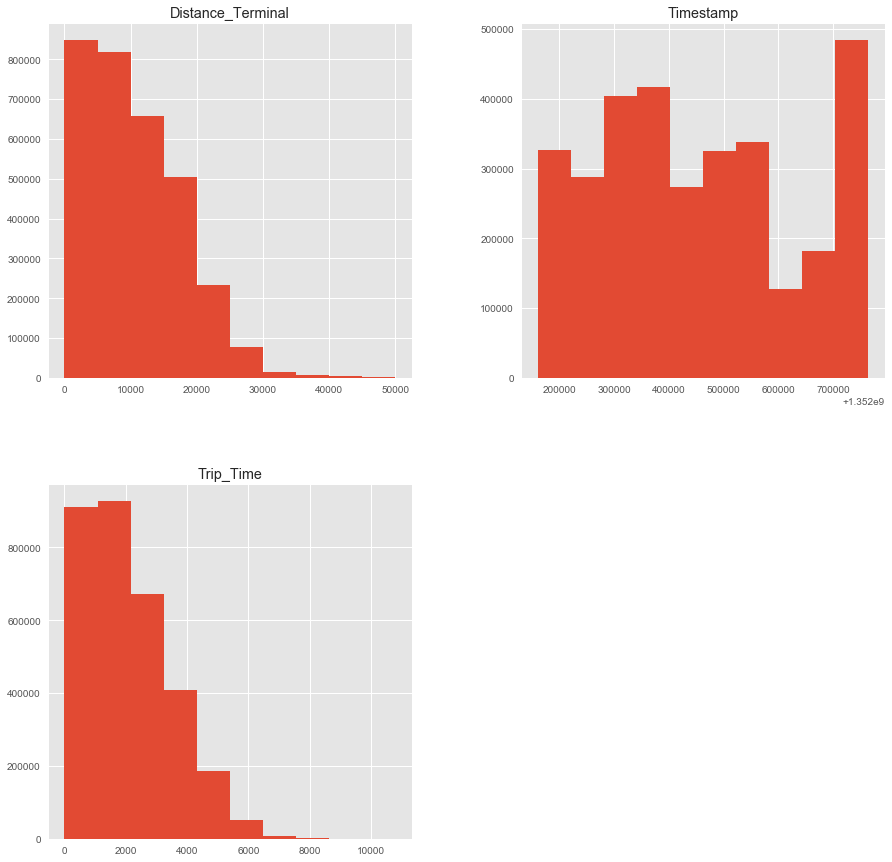

In [41]:
continuous_columns = df[continuous_features].columns
df[continuous_columns].hist(figsize=(15, 15))
plt.savefig('histograms.jpg')

## Plot Box Plots for all Continuous Features

ValueError: Format "jpg" is not supported.
Supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz.

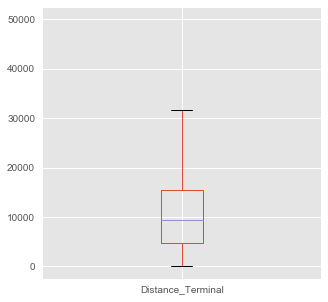

In [42]:
%matplotlib inline

for col in continuous_columns:
    f = df[col].plot(kind='box', figsize=(5, 5))
    plt.savefig(col + 'box_plots.jpg')
    plt.show()

## Plot Bar Plots for all the Categorical Features

In [ ]:
%matplotlib inline
categorical_columns = df[categorical_features].columns

for column in categorical_columns:
    f = df[column].value_counts().plot(kind='bar', title=column, figsize=(5, 5))
    plt.savefig(column + 'bar_plots.jpg')
    plt.show()

## Data Quality Issues

### Continuous Features

## Issue 1: 
### Trip Time: Max Value is 23hours - must be an error (invalid data because this is a derived feature)
### Distance Terminal: Max Value is 318km - must be an error (invalid data because this is a derived feature)
#### For both of these we will need to find and fix the error and regenerate the ABT

## Data Understanding

### Print the correlations between the continuous features

In [ ]:
sns.set(style='white')
corr = df[continuous_features].corr()
print(corr)

In [ ]:
# a nicer representation of correlations 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colour map - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
           square=True, xticklabels=True, yticklabels=True,
           linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

## Plot the scatter plots of each pair of continuous descriptive features and target feature

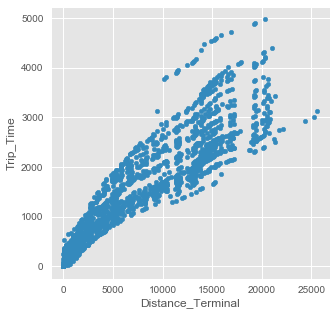

In [33]:
% matplotlib inline
df.plot(kind='scatter', x='Distance_Terminal', y='Trip_Time',  figsize=(5, 5))
plt.savefig('books_read.png')

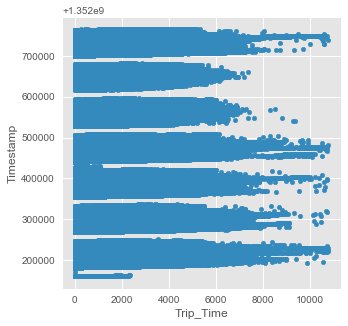

In [44]:
% matplotlib inline
df.plot(kind='scatter', x='Trip_Time', y='Timestamp', figsize=(5, 5))

## For each categorical feature, plot the pairwise interaction with the target feature (barplots or stacked barplots)

In [45]:
print(categorical_features)

['Journey_Pattern_ID', 'Date', 'Vehicle_Journey_ID', 'Stop_ID', 'At_Stop', 'day_of_week']


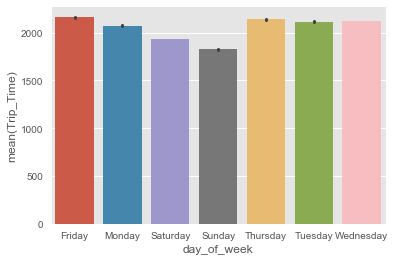

In [46]:
sns.barplot(x="day_of_week", y="Trip_Time", data=df)

### There are too many unique values in the other categorical features to plot them - should we look at binning them? 

# Modeling
### Despite the data quality issues, we need to have a model to connect to the front end. This model will be a placeholder until we resolve the issues with our data cleaning. 

In [14]:
import sklearn
import statsmodels.formula.api as sm
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

/Users/April/anaconda/envs/comp47350/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### As this is a regression problem (we are trying to predict a continuous feature) I'm going to start with a simple linear/multiple regression model. 

In [20]:
df = pd.read_csv('sample_week_analysis.csv')

In [23]:
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head()

,Timestamp,Line_ID,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Block_ID,Vehicle_ID,Stop_ID,Distance_Terminal,datetime,day_of_week,Trip_Time
0,1352160002,41.0,041B0002,2012-11-06,61,-6.264167,53.453217,41008,33631,3874,0.0,2012-11-06 00:00:02,Tuesday,0
1,1352160002,27.0,00270001,2012-11-06,4976,-6.290833,53.319332,27011,33415,2355,0.0,2012-11-06 00:00:02,Tuesday,0
2,1352160002,140.0,01400001,2012-11-06,6615,-6.276083,53.343884,140010,33141,895,0.0,2012-11-06 00:00:02,Tuesday,0
3,1352160002,83.0,083A0001,2012-11-06,7099,-6.273733,53.419632,83002,40019,324,0.0,2012-11-06 00:00:02,Tuesday,0
4,1352160002,16.0,016C0001,2012-11-06,6175,-6.254583,53.355534,16017,33633,270,0.0,2012-11-06 00:00:02,Tuesday,0


## Split the Data into Training and Test Sets

In [9]:
df=df.loc[df['Journey_Pattern_ID']=='041B0002']
df.shape

(1651, 13)

In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
df.head()

,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Delay,Stop_ID,At_Stop,Distance_Terminal,datetime,day_of_week,Trip_Time
0,1352160002,041B0002,2012-11-05,61,-6.264167,53.453217,-623,3874,1,0.00,2012-11-06 00:00:02,Tuesday,0
1,1352201449,041B0002,2012-11-06,51,-6.255460,53.349075,41,288,0,0.00,2012-11-06 11:30:49,Tuesday,0
2,1352201469,041B0002,2012-11-06,51,-6.254753,53.351208,-57,1171,0,242.01,2012-11-06 11:31:09,Tuesday,20
3,1352201487,041B0002,2012-11-06,51,-6.256154,53.353180,-126,1172,0,480.48,2012-11-06 11:31:27,Tuesday,38
4,1352201506,041B0002,2012-11-06,51,-6.257180,53.354671,-174,1173,0,659.93,2012-11-06 11:31:46,Tuesday,57


In [15]:
feature_cols = ['Distance_Terminal','day_of_week']
X = df[feature_cols]
y = df['Trip_Time']
X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
X['Journey_Pattern_ID'] = X['Journey_Pattern_ID'].astype('object')
X['day_of_week'] = X['day_of_week'].astype('object')

KeyError: 'Journey_Pattern_ID'

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in X.columns.values:
    if X[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=X[col]
        le.fit(data.values)
        X[col]=le.transform(X[col])
X

/Users/April/anaconda/envs/comp47350/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Distance_Terminal,day_of_week
0,0.00,5
1,0.00,5
2,242.01,5
3,480.48,5
4,659.93,5
5,929.79,5
6,1245.99,5
7,1395.39,5
8,1847.86,5
9,2103.72,5


In [34]:
df_linear = pd.concat([X_train, y_train], axis=1)
lm = sm.ols(formula = "Trip_Time ~ Distance_Terminal", data=df_linear).fit()

In [35]:
lm.params

Intercept            386.583109
Distance_Terminal      0.154936
dtype: float64

In [36]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Trip_Time   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     4528.
Date:                Tue, 11 Jul 2017   Prob (F-statistic):               0.00
Time:                        17:03:09   Log-Likelihood:                -8741.1
No. Observations:                1155   AIC:                         1.749e+04
Df Residuals:                    1153   BIC:                         1.750e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           386.5831     23.568     16.403      0.000     340.343     432.823
Distance_Terminal     0.1549      0.002     67.291      0.000       0.150       0.159
==============================================================================
Omnibus:                      153.437   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.452
Skew:                           0.855   Prob(JB):                     2.28e-58
Kurtosis:                       4.609   Cond. No.                     1.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
lm_predictions = lm.predict(X_test)

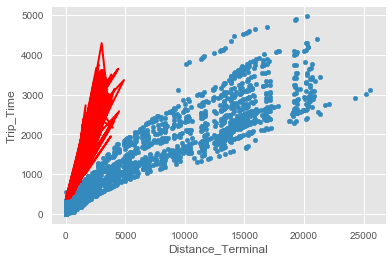

In [38]:
df.plot(kind='scatter', x='Distance_Terminal', y='Trip_Time')
plt.plot(y_test, lm_predictions, c='red', linewidth=2)

plt.savefig('books_read.png')

In [21]:
lm.conf_int()

,0,1
Intercept,467.688138,621.146090
day_of_week[T.Monday],-338.812070,-143.146389
day_of_week[T.Saturday],-392.751357,-207.574801
day_of_week[T.Sunday],-443.835592,-228.988009
day_of_week[T.Thursday],-278.562733,-86.787843
day_of_week[T.Tuesday],-120.893784,70.051505
day_of_week[T.Wednesday],-184.902196,9.521223
Distance_Terminal,0.151003,0.159759


In [21]:
lm.pvalues

Intercept                   2.390509e-48
day_of_week[T.Monday]       1.981930e-05
day_of_week[T.Saturday]     3.720477e-11
day_of_week[T.Sunday]       2.867337e-08
day_of_week[T.Thursday]     7.514442e-04
day_of_week[T.Tuesday]      9.176258e-02
day_of_week[T.Wednesday]    6.344337e-01
Distance_Terminal           0.000000e+00
dtype: float64

In [22]:
lm.rsquared

0.80396833940267798

### Needed to use an sklearn model instead of statsmodels because I couldn't get the pickle to work with statsmodels. 

In [25]:
from sklearn.linear_model import LinearRegression
lm_sk = LinearRegression()
lm_sk.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
import pickle

In [74]:
pickle.dump(lm_sk, open('sk_linear_model1', 'wb'))

In [75]:
loaded_model = pickle.load(open('sk_linear_model1', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.0344929749154


# SVM

In [62]:
#Import SVM and assign to a model 
from sklearn import svm
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
clf = svm.SVR()

In [63]:
# Prepare the descriptive features
X = pd.concat([df[['Distance_Terminal']]], axis=1)
y = df.Trip_Time 

print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

Descriptive features:
       Distance_Terminal
0                  0.00
1                  0.00
2                242.01
3                480.48
4                659.93
5                929.79
6               1245.99
7               1395.39
8               1847.86
9               2103.72
10              2265.05
11              2580.34
12              2600.72
13              3035.73
14              3131.88
15              3534.55
16              3910.13
17              4050.39
18              4208.19
19              4778.19
20              4931.12
21              5028.03
22              5080.06
23              5299.74
24              5764.34
25              6487.38
26              6732.51
27              7278.65
28              7868.63
29              8257.86
...                 ...
1621            5914.91
1622            6564.42
1623            6751.35
1624            6821.72
1625            7547.60
1626            8185.88
1627            8272.21
1628            9089.66
1629            9

In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in X.columns.values:
    if X[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=X[col]
        le.fit(data.values)
        X[col]=le.transform(X[col])
X

,Distance_Terminal
0,0.00
1,0.00
2,242.01
3,480.48
4,659.93
5,929.79
6,1245.99
7,1395.39
8,1847.86
9,2103.72


In [64]:
# Train the model 
%time clf.fit(X, y)

CPU times: user 104 ms, sys: 3.66 ms, total: 108 ms
Wall time: 110 ms


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [65]:
# Get the predicetion 
y_rbf = clf.predict(X)
y_rbf

array([ 1568.72109916,  1568.72109916,  1598.18128429, ...,  1601.        ,
        1601.        ,  1601.        ])

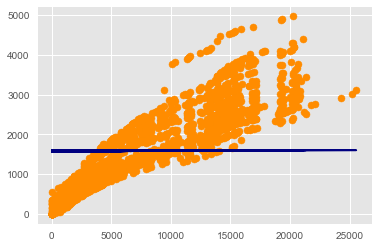

In [71]:
plt.scatter(X['Distance_Terminal'], y, color='darkorange', label='data')
plt.plot(X['Distance_Terminal'], y_rbf, color='navy', label='RBF model')
plt.savefig('SVM_result.png')

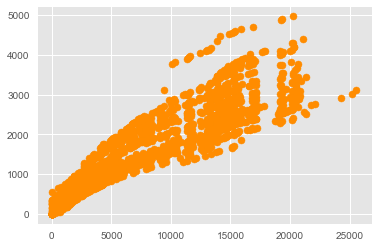

In [67]:
plt.scatter(X['Distance_Terminal'], y, color='darkorange', label='data')

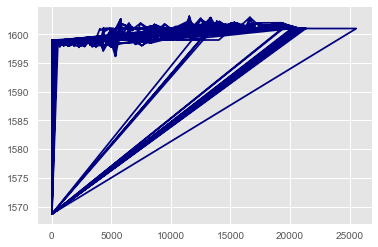

In [69]:
plt.plot(X['Distance_Terminal'], y_rbf, color='navy', label='RBF model')
plt.show()